_Lambda School Data Science — Linear Models_

# Doing Linear Regression

### Objectives
- arrange data into X features matrix and y target vector
- use scikit-learn for linear regression
- use regression metric: MAE
- do one-hot encoding
- scale features

### Contents
1. Libraries
2. Pre-read
3. Process
4. Project

# Libraries

### Install [category_encoders](http://contrib.scikit-learn.org/categorical-encoding/) (version 2+)
- Local Anaconda: `conda install -c conda-forge category_encoders`
- Google Colab: `pip install category_encoders`

In [44]:
!pip install category_encoders

### Install [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) (version 2+)
- `pip install -U pandas-profiling`

In [2]:
# !pip install -U pandas-profiling

# Pre-reads

#### [Jake VanderPlas, Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html). 

Read up through “Supervised learning example: Simple linear regression”. You can stop when you get to “Supervised learning example: Iris classification.”


# Process

#### Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

![](https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295)


## Business Question --> Data Question --> Data Answer (for Supervised Learning)

#### Francois Chollet, [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/README.md), Chapter 4: Fundamentals of machine learning, "A universal workflow of machine learning"
 
> **1. Define the problem at hand and the data on which you’ll train.** Collect this data, or annotate it with labels if need be.

> **2. Choose how you’ll measure success on your problem.** Which metrics will you monitor on your validation data?

> **3. Determine your evaluation protocol:** hold-out validation? K-fold validation? Which portion of the data should you use for validation?

> **4. Develop a first model that does better than a basic baseline:** a model with statistical power.

> **5. Develop a model that overfits.** The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it.

> **6. Regularize your model and tune its hyperparameters, based on performance on the validation data.** Repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. 

> **Iterate on feature engineering: add new features, or remove features that don’t seem to be informative.** Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.


## Define the data on which you'll train / Add new features or remove features

#### Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Data Representation in Scikit-Learn

> The best way to think about data within Scikit-Learn is in terms of tables of data.

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

> The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

> The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. 

> The information can be thought of as a two-dimensional numerical array or matrix, which we will call the _features matrix._ By convention, this features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

> In addition to the feature matrix `X`, we also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. 

> Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to _predict from the data:_ in statistical terms, it is the dependent variable.

#### Google Developers, [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary/#l) 

> Each example in a labeled dataset consists of one or more features and a label. 

> For instance, in a housing dataset, the features might include the number of bedrooms, the number of bathrooms, and the age of the house, while the label might be the house's price. 

> In a spam detection dataset, the features might include the subject line, the sender, and the email message itself, while the label would probably be either "spam" or "not spam."

#### Wikipedia, [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

## Determine evaluation protocol

#### Sebastian Raschka, [Model Evaluation]( https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)
> <img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

## Develop a first model that does better than a basic baseline

### Why begin with baselines?

[My mentor](https://www.linkedin.com/in/jason-sanchez-62093847/) [taught me](https://youtu.be/0GrciaGYzV0?t=40s):

>***Your first goal should always, always, always be getting a generalized prediction as fast as possible.*** You shouldn't spend a lot of time trying to tune your model, trying to add features, trying to engineer features, until you've actually gotten one prediction, at least. 

> The reason why that's a really good thing is because then ***you'll set a benchmark*** for yourself, and you'll be able to directly see how much effort you put in translates to a better prediction. 

> What you'll find by working on many models: some effort you put in, actually has very little effect on how well your final model does at predicting new observations. Whereas some very easy changes actually have a lot of effect. And so you get better at allocating your time more effectively.

My mentor's advice is echoed and elaborated in several sources:

[Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)

> Why start with a baseline? A baseline will take you less than 1/10th of the time, and could provide up to 90% of the results. A baseline puts a more complex model into context. Baselines are easy to deploy.

[Measure Once, Cut Twice: Moving Towards Iteration in Data Science](https://blog.datarobot.com/measure-once-cut-twice-moving-towards-iteration-in-data-science)

> The iterative approach in data science starts with emphasizing the importance of getting to a first model quickly, rather than starting with the variables and features. Once the first model is built, the work then steadily focuses on continual improvement.

[*Data Science for Business*](https://books.google.com/books?id=4ZctAAAAQBAJ&pg=PT276), Chapter 7.3: Evaluation, Baseline Performance, and Implications for Investments in Data

> *Consider carefully what would be a reasonable baseline against which to compare model performance.* This is important for the data science team in order to understand whether they indeed are improving performance, and is equally important for demonstrating to stakeholders that mining the data has added value.

### What does baseline mean?

Baseline is an overloaded term, as you can see in the links above. Baseline has multiple meanings:

#### The score you'd get by guessing a single value

> A baseline for classification can be the most common class in the training dataset.

> A baseline for regression can be the mean of the training labels. —[Will Koehrsen](https://twitter.com/koehrsen_will/status/1088863527778111488)

#### The score you'd get by guessing in a more granular way

> A baseline for time-series regressions can be the value from the previous timestep.

#### Fast, first models that beat guessing

What my mentor was talking about.

#### Complete, tuned "simpler" model

Can be simpler mathematically and computationally. For example, Logistic Regression versus Deep Learning.

Or can be simpler for the data scientist, with less work. For example, a model with less feature engineering versus a model with more feature engineering.

#### Minimum performance that "matters"

To go to production and get business value.

#### Human-level performance 

Your goal may to be match, or nearly match, human performance, but with better speed, cost, or consistency.

Or your goal may to be exceed human performance.

## Use scikit-learn to fit a model

#### Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

> Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

> 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn. 
> 2. Choose model hyperparameters by instantiating this class with desired values. 
> 3. Arrange data into a features matrix and target vector following the discussion above.
> 4. Fit the model to your data by calling the `fit()` method of the model instance.
> 5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

# Project: Predict NYC apartment rent 🏠💸

You'll use a real-world data with rent prices for a subset of apartments in New York City!


## Define the data on which you'll train

- Get the data
- What's the target?
- Regression or classification?

In [3]:
LOCAL = '../data/nyc/nyc-rent-2016.csv'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'

import pandas as pd
df = pd.read_csv(WEB)
assert df.shape == (48300, 34)

In [4]:
import pandas_profiling as pdp

## DO TRAIN/TEST SPLIT
 
 For this project, we'll split based on time. 

- Use data from April & May 2016 to train.
- Use data from June 2016 to test.


In [5]:
df['created'] = pd.to_datetime(df['created'], infer_datetime_format = True)

## Begin with baselines for regression

In [6]:
df['month'] = df['created'].dt.month

In [7]:
train = df.query('month < 6') #df[df['month']<6]
test = df.query('month == 6') #df[df['month']==6]

In [8]:
train.shape, test.shape

((31515, 35), (16785, 35))

In [9]:
train['price'].mean()

3432.7534190068222

In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

y_test = test['price']
y_pred = [train['price'].mean()]*len(y_test)
print(len(y_test), len(y_pred))

16785 16785


In [11]:
print(mae(y_test,y_pred))

1052.6798017842948


## Use scikit-learn for linear regression, with 1 feature




Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn


In [12]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

Refer to scikit-learn documentation to see what model hyperparameters you can choose. For example: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [13]:
linr = LinearRegression()
linr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Arrange data into X features matrix and y target vector

In [14]:
feature = ['bedrooms']
target = 'price'

X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [15]:
X_train.shape, y_train.shape

((31515, 1), (31515,))

### Fit the model to your data by calling the `fit()` method of the model instance

In [16]:
linr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [17]:
n_bedrm = 2
linr.predict([[n_bedrm]])

array([3795.24565116])

In [18]:
#Slope, increase/decrease per feature
linr.coef_

array([725.88274853])

In [19]:
#y intercept at 0
linr.intercept_

2343.4801541070037

In [20]:
y_pred = linr.predict(X_test)

In [21]:
y_pred

array([4521.12839969, 3795.24565116, 3069.36290263, ..., 3069.36290263,
       3795.24565116, 3795.24565116])

## Use regression metric: MAE

In [22]:
mae(y_test,y_pred)

865.7153554398525

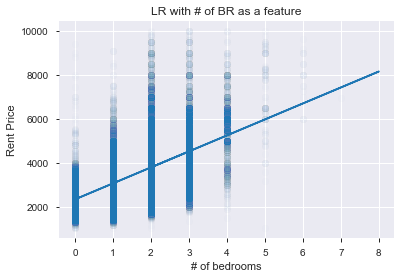

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, alpha=0.01)
plt.plot(X_test, y_pred)

plt.xlabel('# of bedrooms')
plt.ylabel('Rent Price')
plt.title('LR with # of BR as a feature');

## Use scikit-learn for linear regression, with 2 features

Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn

In [24]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

In [25]:
linr2 = LinearRegression()

### Arrange data into X features matrix and y target vector

In [26]:
features = ['bedrooms', 'bathrooms']
target2 = 'price'

X_train2 = train[features]
y_train2 = train[target]

X_test2 = test[features]
y_test2 = test[target]

In [27]:
X_train2.shape, y_train.shape

((31515, 2), (31515,))

### Fit the model to your data by calling the `fit()` method of the model instance

In [32]:
linr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [33]:
y_pred = linr2.predict(X_test2)

## Use regression metric: MAE

In [34]:
mae(y_test2, y_pred)

754.5508722934989

In [35]:
linr2.coef_

array([ 426.71051253, 1499.03032982])

In [37]:
linr2.intercept_

1022.9589927686261

## Do one-hot encoding of categorical features

### Which features are non-numeric?

In [38]:
train.describe(exclude='number')

,created,description,display_address,street_address,interest_level
count,31515,30549,31447,31509,31515
unique,31116,25482,6492,11247,3
top,2016-05-02 03:41:36,,Broadway,505 West 37th Street,low
freq,3,897,268,120,21613
first,2016-04-01 22:12:41,NaN,NaN,NaN,NaN
last,2016-05-31 23:10:48,NaN,NaN,NaN,NaN


In [39]:
train['description'].head()

2    Top Top West Village location, beautiful Pre-w...
3    Building Amenities - Garage - Garden - fitness...
4    Beautifully renovated 3 bedroom flex 4 bedroom...
5                                                     
6    Stunning unit with a great location and lots o...
Name: description, dtype: object

### Check "cardinality" of non-numeric features

[Cardinality](https://simple.wikipedia.org/wiki/Cardinality) means the number of unique values that a feature has:
> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3. 

"One-hot encoding" adds a dimension for each unique value of each categorical feature. So, it may not be a good choice for "high cardinality" categoricals that have dozens, hundreds, or thousands of unique values. 

In [45]:
import category_encoders as ce

### Explore `interest_level` feature

In [42]:
train['interest_level'].head()

2      high
3       low
4       low
5    medium
6       low
Name: interest_level, dtype: object

### Encode `interest_level` feature

In [46]:
encoder = ce.OneHotEncoder(use_cat_names = True)
encoded = encoder.fit_transform(train['interest_level'])

In [47]:
encoded

,interest_level_high,interest_level_low,interest_level_medium
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,1,0
7,0,1,0
8,0,0,1
9,0,1,0
10,0,1,0
12,1,0,0


## Do one-hot encoding & Scale features, 
within a complete model fitting workflow.

### Why and how to scale features before fitting linear models

Scikit-Learn User Guide, [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
> Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

> The `preprocessing` module further provides a utility class `StandardScaler` that implements the `Transformer` API to compute the mean and standard deviation on a training set. The scaler instance can then be used on new data to transform it the same way it did on the training set.

### How to use encoders and scalers in scikit-learn
- Use the **`fit_transform`** method on the **train** set
- Use the **`transform`** method on the **validation** set

In [71]:
from sklearn.preprocessing import StandardScaler as sc

feature3 = [
    'bedrooms',
    'bathrooms',
    'latitude',
    'longitude',
    'interest_level',
    'swimming_pool'
]
target3 = 'price'

X_train3 = train[feature3]
y_train3 = train[target3]

X_test3 = test[feature3]
y_test3 = test[target3]

In [68]:
train[target3].shape

(31515,)

In [72]:
X_train3.shape, y_train3.shape

((31515, 6), (31515,))

In [73]:
encoder2 = ce.OneHotEncoder(use_cat_names = True)
X_train3 = encoder2.fit_transform(X_train3)
X_test3 = encoder2.fit_transform(X_test3)

In [74]:
scaler = sc()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.fit_transform(X_test3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [75]:
X_train3

array([[-0.45807512, -0.42056347, -0.30435554, ..., -1.4773931 ,
        -0.55395212, -0.23796732],
       [-0.45807512, -0.42056347,  0.07968984, ...,  0.67686792,
        -0.55395212, -0.23796732],
       [ 2.28697859, -0.42056347,  1.86511936, ...,  0.67686792,
        -0.55395212, -0.23796732],
       ...,
       [-0.45807512, -0.42056347,  0.23737735, ...,  0.67686792,
        -0.55395212, -0.23796732],
       [-1.37309302, -0.42056347, -1.12331324, ...,  0.67686792,
        -0.55395212, -0.23796732],
       [ 0.45694278, -0.42056347,  3.02997224, ...,  0.67686792,
        -0.55395212, -0.23796732]])

In [76]:
X_train3.shape, y_train3.shape

((31515, 8), (31515,))

In [77]:
linr3 = LinearRegression()
linr3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_pred = linr3.predict(X_test3)
y_pred

array([3709.88879185, 3529.64394766, 2674.73386702, ..., 2820.04795683,
       3587.07455745, 3097.64080722])

In [79]:
mae(y_test3,y_pred)

637.7065976289917

# Assignment
1. Start a clean notebook. Follow the processes taught today.
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Begin with baseline for regression.
4. Select two or more features. 
5. Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get the mean absolute error for the test data.
7. Get the model's coefficients and intercept.
8. Commit your notebook to your fork of the GitHub repo.

_What's the best test MAE you can get? Share your score and features used with your cohort on Slack!_

### Stretch Goals
- Try at least 3 different feature combinations.
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [Engineer new features!](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

- Try different [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html)
- Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.